## The Normal Equation

Generate a linear-looking data to test equation

In [2]:
import numpy as np

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

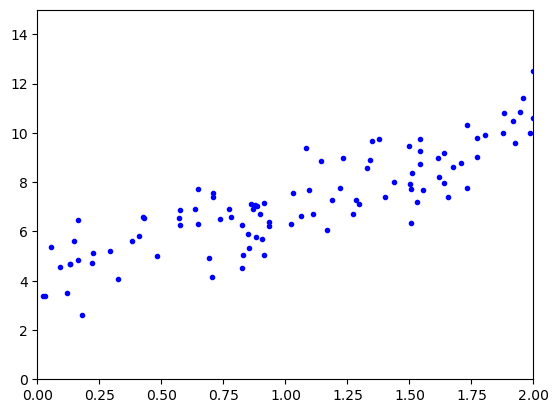

In [3]:
import matplotlib.pyplot as plt

plt.plot(x, y, "b.")
plt.axis([0,2, 0,15])
plt.show()

compute the θ using the normal equation

In [4]:
x_b = np.c_[np.ones((100, 1)), x] # add x0 = 1 to each instance
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [5]:
theta_best

array([[4.07806305],
       [2.99988996]])

make predictions using the found theta

In [6]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2,1)), x_new] # add x0 = 1 to each new instance
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 4.07806305],
       [10.07784297]])

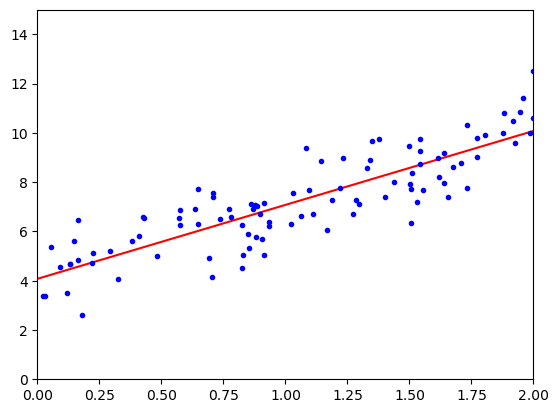

In [7]:
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Performing Linear Regression with Scikit-lear

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.07806305]), array([[2.99988996]]))

In [9]:
lin_reg.predict(x_new)

array([[ 4.07806305],
       [10.07784297]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[4.07806305],
       [2.99988996]])

This function computes θ = X+y, where X+ is the pseudoinverse of X (specifically the
Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoin‐
verse directly:

In [11]:
np.linalg.pinv(x_b).dot(y)

array([[4.07806305],
       [2.99988996]])

## Batch Gradient Descent

In [12]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
   gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
   theta = theta - eta * gradients

theta

array([[4.07806305],
       [2.99988996]])